### Plotting alignment data

In [1]:
%matplotlib inline
import pandas as pd
import utils.db_utils as db
import utils.plot_utils as plot
from config import getConfig

############################################
# get configuration
cfg = getConfig() # configure values in config.js
############################################

targetBibleType = cfg['targetBibleType']
origLangPathGreek =  cfg['origLangPathGreek']
origLangPathHebrew = cfg['origLangPathHebrew']
targetLanguagePath = cfg['targetLanguagePath']
dbPath = cfg['dbPath']
testamentStr = cfg['testamentStr']
baseDataPath = cfg['baseDataPath']

targetLang = 'en'

connections = db.initAlignmentDB(dbPath)
connection = db.getConnectionForTable(connections, 'default')
connection_owi = db.getConnectionForTable(connections, db.original_words_index_table)

Connection to SQLite DB successful
Connection to SQLite DB successful


In [2]:
# find all alignments for this lemma
def findAlignmentsForWord(connection_owi, word, minAlignments, searchLemma=False, maxRows=None):
    alignmentsByWord = db.findAlignmentsFromIndexDbForOrigWord(connection_owi, word, searchLemma, maxRows)
    alignmentsList, rejectedAlignmentsList = db.filterAlignments(alignmentsByWord, minAlignments)
    return pd.DataFrame(alignmentsList)

word = 'θεός' # Found 1354
# word = 'καί' # Found 8995
# word = 'ὁ' # Found 20377
# word = 'αὐτός' # Found 5573

minAlignments = 0
lemmaAlignments = findAlignmentsForWord(connection_owi, word, minAlignments, searchLemma=True)
print(f"Found {len(lemmaAlignments)} alignments")

Found 1354 alignments


In [3]:
# find all alignments for this original word

# word = 'Θεός' # found 69
# word = 'Θεὸς' # found 239
word = 'Θεοῦ'  # found 712
# word = 'καί' # Found 32
# word = 'καὶ' #Found 8961
# word = 'τὸ' # Found 1715
# word = 'αὐτοῦ' # Found 1415

origAlignments = findAlignmentsForWord(connection_owi, word, minAlignments, searchLemma = False)
print(f"Found {len(origAlignments)} alignments")

Found 712 alignments


In [4]:
db.describeAlignments(origAlignments)

Alignments description:
       alignment_key  origWordsCount  origWordsBetween  targetWordsCount  \
count     712.000000      712.000000        712.000000        712.000000   
mean    82251.289326        1.632022          0.002809          1.676966   
std     33753.297013        0.491260          0.074953          0.519253   
min      1047.000000        1.000000          0.000000          1.000000   
25%     57349.250000        1.000000          0.000000          1.000000   
50%     86998.000000        2.000000          0.000000          2.000000   
75%    109115.750000        2.000000          0.000000          2.000000   
max    130089.000000        3.000000          2.000000          6.000000   

       targetWordsBetween  alignmentTxtFrequency  alignmentsTotal  \
count               712.0             712.000000            712.0   
mean                  0.0              24.639802            712.0   
std                   0.0              15.396044              0.0   
min            

{'desc': {'alignment_key': {'count': 712.0,
   'mean': 82251.28932584269,
   'std': 33753.297013483716,
   'min': 1047.0,
   '25%': 57349.25,
   '50%': 86998.0,
   '75%': 109115.75,
   'max': 130089.0},
  'origWordsCount': {'count': 712.0,
   'mean': 1.6320224719101124,
   'std': 0.4912595935374137,
   'min': 1.0,
   '25%': 1.0,
   '50%': 2.0,
   '75%': 2.0,
   'max': 3.0},
  'origWordsBetween': {'count': 712.0,
   'mean': 0.0028089887640449437,
   'std': 0.07495316889958614,
   'min': 0.0,
   '25%': 0.0,
   '50%': 0.0,
   '75%': 0.0,
   'max': 2.0},
  'targetWordsCount': {'count': 712.0,
   'mean': 1.6769662921348314,
   'std': 0.5192527455591942,
   'min': 1.0,
   '25%': 1.0,
   '50%': 2.0,
   '75%': 2.0,
   'max': 6.0},
  'targetWordsBetween': {'count': 712.0,
   'mean': 0.0,
   'std': 0.0,
   'min': 0.0,
   '25%': 0.0,
   '50%': 0.0,
   '75%': 0.0,
   'max': 0.0},
  'alignmentTxtFrequency': {'count': 712.0,
   'mean': 24.63980242393637,
   'std': 15.396043953078559,
   'min': 0.140

### Analysis of alignments for Θεοῦ in the en_ult:

#### Frequency of alignments:

In [5]:
frequency = origAlignments['alignmentText'].value_counts()
print(frequency)

τοῦ Θεοῦ = of God                          299
Θεοῦ = God                                 118
Θεοῦ = of God                              102
τοῦ Θεοῦ = God                             100
Θεοῦ = God s                                23
τοῦ Θεοῦ = God s                            20
τοῦ Θεοῦ = of                               11
Θεοῦ = of                                    8
Θεοῦ = of the                                5
τοῦ Θεοῦ = from God                          4
τοῦ Θεοῦ = to God                            2
τοῦ Θεοῦ = of God s                          2
ἐνώπιον τοῦ Θεοῦ = and God                   1
Θεοῦ = the Son                               1
τὴν τοῦ Θεοῦ = of God s                      1
τοῦ Θεοῦ = godly                             1
τὰ τοῦ Θεοῦ = the things that are God s      1
τοῦ Θεοῦ = about God                         1
Θεοῦ = in God                                1
Θεοῦ = Father                                1
ὅτι Θεοῦ = of God                            1
Θεοῦ = becaus

##### Notes:
- the left column is the specific alignment, and the right column is the number of times that specific alignment has been made so far in the NT.
- alignments that contain more words are more suspect.
- in future will combine "God s" to "God's" before doing analysis
<p></p>

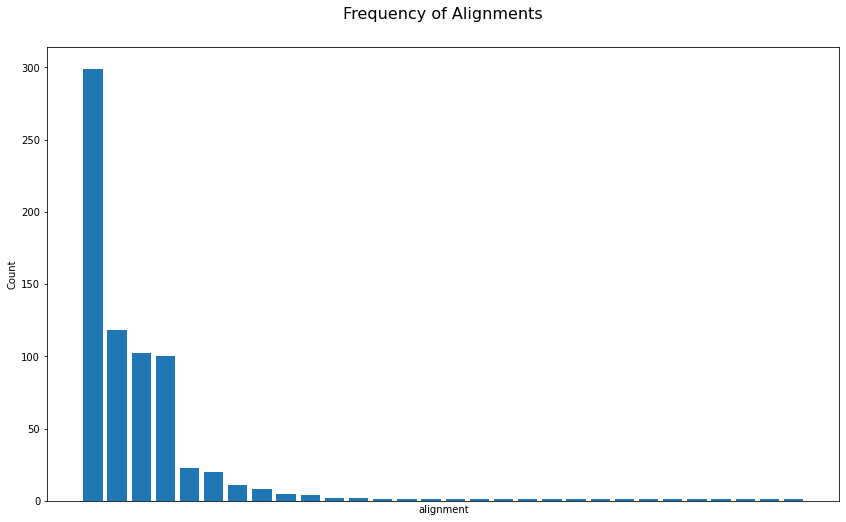

In [6]:
plot.plotFieldFrequency(frequency, "", 'alignment', title="Frequency of Alignments", xNumbers=False, xShowTicks=False)

### Analysis:

#### Analysis of numerical metrics:

In [7]:
descr = origAlignments.describe()
print(f"Alignments description:\n{descr}")

Alignments description:
       alignment_key  origWordsCount  origWordsBetween  targetWordsCount  \
count     712.000000      712.000000        712.000000        712.000000   
mean    82251.289326        1.632022          0.002809          1.676966   
std     33753.297013        0.491260          0.074953          0.519253   
min      1047.000000        1.000000          0.000000          1.000000   
25%     57349.250000        1.000000          0.000000          1.000000   
50%     86998.000000        2.000000          0.000000          2.000000   
75%    109115.750000        2.000000          0.000000          2.000000   
max    130089.000000        3.000000          2.000000          6.000000   

       targetWordsBetween  alignmentTxtFrequency  alignmentsTotal  \
count               712.0             712.000000            712.0   
mean                  0.0              24.639802            712.0   
std                   0.0              15.396044              0.0   
min            

#### Analysis of original language word count:

In [8]:
field = 'origWordsCount'
field_frequency = origAlignments[field].value_counts().sort_index()
print(f"\nFrequency of {field}:\n{field_frequency}")


Frequency of origWordsCount:
1    265
2    444
3      3
Name: origWordsCount, dtype: int64


##### Notes:
- this field analysis suggests for θεός nearly all the original language word counts are tight. The word counts of 3 may need review. So we could probaby use that as a threshold for to flag for review.
<p></p>

#### Analysis of target language word count:

In [9]:
field = 'targetWordsCount'
field_frequency = origAlignments[field].value_counts().sort_index()
print(f"\nFrequency of {field}:\n{field_frequency}")


Frequency of targetWordsCount:
1    241
2    464
3      5
4      1
6      1
Name: targetWordsCount, dtype: int64


##### Notes:
- this field analysis suggests that for θεός likely all the target language word counts are tight. The word count of 3 probably good for English (`of a god`). But still we could probaby use that as a threshold for to flag for review.
<p></p>

#### Analysis of count of extra unaligned words between aligned original language words:


Frequency of origWordsBetween:
0    711
2      1
Name: origWordsBetween, dtype: int64


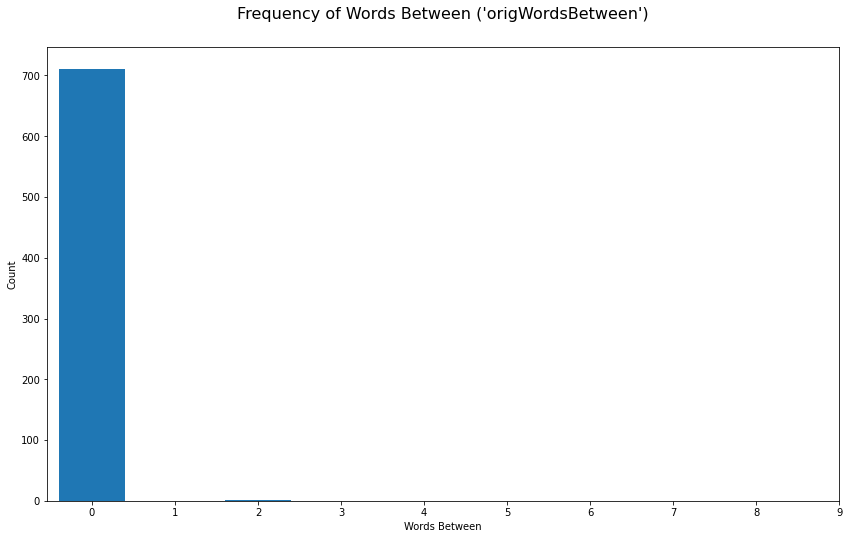

In [10]:
field = 'origWordsBetween'
field_frequency = origAlignments[field].value_counts().sort_index()
print(f"\nFrequency of {field}:\n{field_frequency}")
plot.plotFieldFrequency(field_frequency, field, f"Words Between", max=10)

##### Notes:
- this field analysis suggests that most original language alignments probably good. Probably the cases of a word between (count > 0) aligned words should be reviewed.
<p></p>

#### Analysis of count of extra unaligned words between aligned target language words:


Frequency of targetWordsBetween:
0    712
Name: targetWordsBetween, dtype: int64


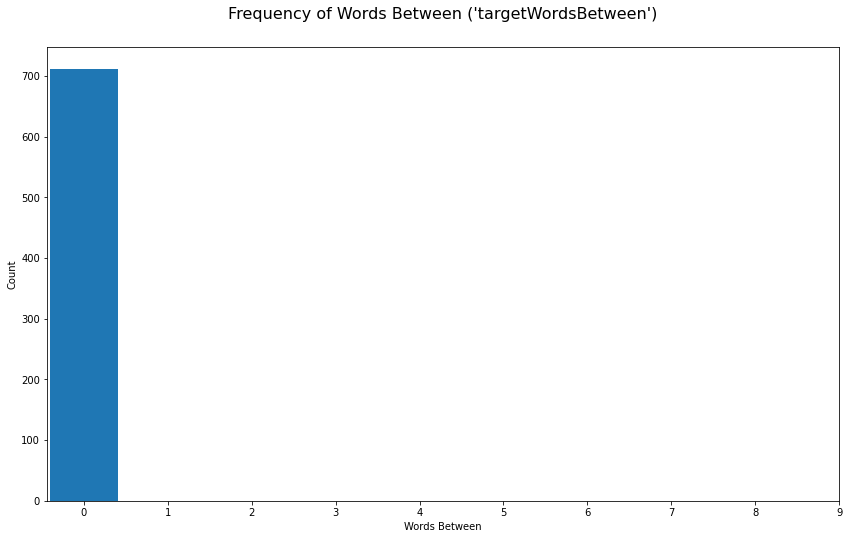

In [11]:
field = 'targetWordsBetween'
field_frequency = origAlignments[field].value_counts().sort_index()
print(f"\nFrequency of {field}:\n{field_frequency}")
plot.plotFieldFrequency(field_frequency, field, f"Words Between", max=10)

##### Notes:
- this field analysis suggests that most target language alignments probably good. Large gaps between aligned words are likely due to wordmap suggesting wrong occurence of a word and the user selecting. Probably the cases of a word between (count > 0) aligned words should be reviewed.
<p></p>